<a href="https://colab.research.google.com/github/harshalgurav/iris_neuralnetwork/blob/main/Classification_Iris_using_Artificial_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#to load dataset
df=pd.read_csv('/content/drive/MyDrive/happymonk/iris.csv')

In [3]:
#to see first 5 records
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#how many rows and columns
df.shape

(150, 5)

In [5]:
#to check null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

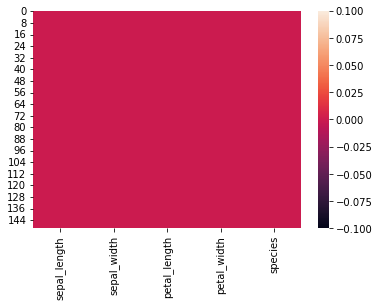

In [6]:
#visulization
sns.heatmap(df.isnull())
plt.show()

In [7]:
#check datatype
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [8]:
#to check duplicate values
df.duplicated().sum()

3

In [9]:
#how many samples of 1 and 0 in insuranceclaim output variable
df["species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [10]:
#randomoversampling
from imblearn.over_sampling import RandomOverSampler

#create object of RandomOverSampler
ros=RandomOverSampler

In [11]:
#split data into 2 parts
df_num=df.select_dtypes(['float64'])
df_cat=df.select_dtypes('object')

In [12]:
df_cat

,species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [13]:
df_num

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [14]:
from sklearn import preprocessing #label encoder: text --> numeric
le = preprocessing.LabelEncoder() #panggil LE
le.fit(df_cat)
df_cat= le.transform(df_cat) #ubah class yang masih text ke numeric

df_cat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:
le.transform (["Iris-setosa", "Iris-versicolor", "Iris-virginica"])

array([0, 1, 2])

In [16]:
from keras.utils.np_utils import to_categorical
df_cat1 = to_categorical(df_cat) 
df_cat1.shape

(150, 3)

In [17]:
df_cat1

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [18]:
from sklearn.preprocessing import normalize
df_num1 = normalize(df_num,norm="l2") 

df_num1.shape

(150, 4)

In [19]:
df_num1

array([[0.80377277, 0.55160877, 0.22064351, 0.0315205 ],
       [0.82813287, 0.50702013, 0.23660939, 0.03380134],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949],
       [0.80003025, 0.53915082, 0.26087943, 0.03478392],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 ],
       [0.78417499, 0.5663486 , 0.2468699 , 0.05808704],
       [0.78010936, 0.57660257, 0.23742459, 0.0508767 ],
       [0.80218492, 0.54548574, 0.24065548, 0.0320874 ],
       [0.80642366, 0.5315065 , 0.25658935, 0.03665562],
       [0.81803119, 0.51752994, 0.25041771, 0.01669451],
       [0.80373519, 0.55070744, 0.22325977, 0.02976797],
       [0.786991  , 0.55745196, 0.26233033, 0.03279129],
       [0.82307218, 0.51442011, 0.24006272, 0.01714734],
       [0.8025126 , 0.55989251, 0.20529392, 0.01866308],
       [0.81120865, 0.55945424, 0.16783627, 0.02797271],
       [0.77381111, 0.59732787, 0.2036345 , 0.05430253],
       [0.79428944, 0.57365349, 0.19121783, 0.05883625],
       [0.80327412, 0.55126656,

In [20]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(df_num1,df_cat1,test_size=0.30,random_state=1)

In [21]:
ytrain.shape

(105, 3)

In [22]:
ytest.shape

(45, 3)

In [23]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam 

model = Sequential()

model.add(Dense(32, input_dim = 4, activation = 'relu')) 
model.add(Dense(64, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))
optimizer = Adam(lr=0.001)
model.compile(optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()
Model: "sequential"

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                160       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 16)                5

In [24]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
history = model.fit(xtrain,ytrain,epochs=250,batch_size=10, verbose=1, validation_data=(xtest, ytest))

Epoch 1/250
11/11 [==============================] - 2s 44ms/step - loss: 1.0933 - accuracy: 0.4381 - val_loss: 1.0818 - val_accuracy: 0.6000
Epoch 2/250
11/11 [==============================] - 0s 12ms/step - loss: 1.0713 - accuracy: 0.5143 - val_loss: 1.0524 - val_accuracy: 0.6000
Epoch 3/250
11/11 [==============================] - 0s 18ms/step - loss: 1.0341 - accuracy: 0.6476 - val_loss: 0.9972 - val_accuracy: 0.6000
Epoch 4/250
11/11 [==============================] - 0s 14ms/step - loss: 0.9620 - accuracy: 0.6286 - val_loss: 0.9005 - val_accuracy: 0.6000
Epoch 5/250
11/11 [==============================] - 0s 11ms/step - loss: 0.8604 - accuracy: 0.6857 - val_loss: 0.7666 - val_accuracy: 0.6000
Epoch 6/250
11/11 [==============================] - 0s 14ms/step - loss: 0.7113 - accuracy: 0.6857 - val_loss: 0.6423 - val_accuracy: 0.6000
Epoch 7/250
11/11 [==============================] - 0s 15ms/step - loss: 0.6011 - accuracy: 0.6952 - val_loss: 0.5436 - val_accuracy: 0.6222
Epoch 

In [26]:
scores = model.evaluate(xtest,ytest) #akurasi data testing
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

2/2 [==============================] - 0s 7ms/step - loss: 0.0619 - accuracy: 1.0000

accuracy: 100.00%


In [27]:
test_pred = model.predict(xtest)

In [28]:
from sklearn.metrics import confusion_matrix #data training
cm = confusion_mtx = confusion_matrix(ytest.argmax(axis=1), test_pred.argmax(axis=1))

cm

array([[14,  0,  0],
       [ 0, 18,  0],
       [ 0,  0, 13]])

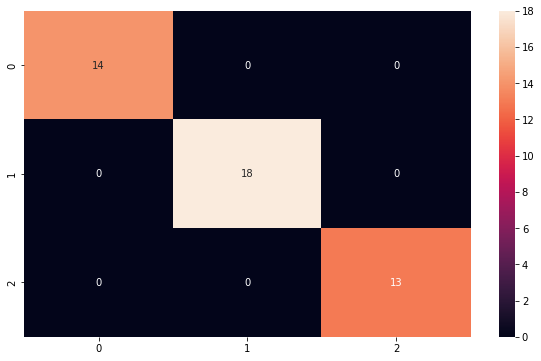

In [29]:
cm_df = pd.DataFrame(cm)                      
plt.figure(figsize=(10,6)) 
sns.heatmap(cm_df, annot=True)

In [30]:
from sklearn.metrics import classification_report
print(classification_report(ytest.argmax(axis=1), test_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

